# Loan Default Prediction

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Load the Data
df = pd.read_csv('/Users/smriti/Desktop/Loan_default.csv')
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
# Number of Missing Values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
# Drop Loan ID
df.drop(['LoanID'], axis=1, inplace=True)

## Exploratory Data Analysis

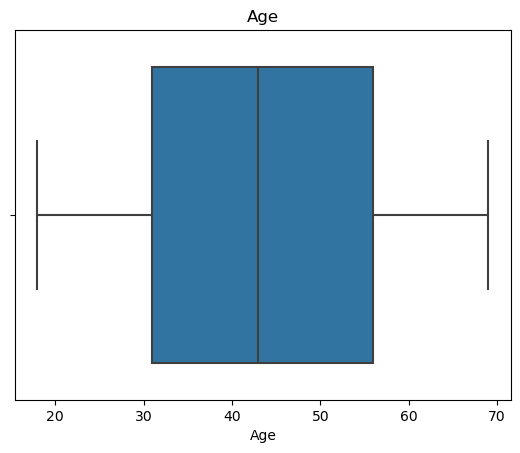

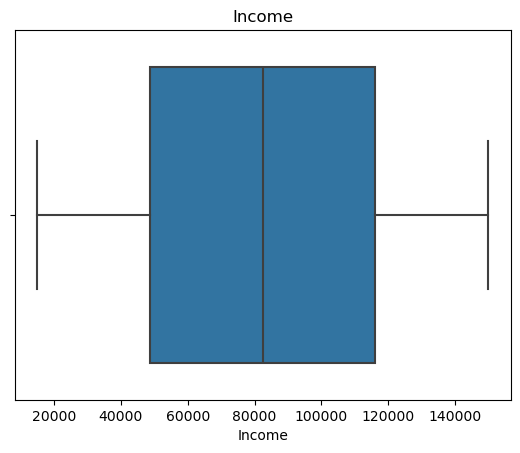

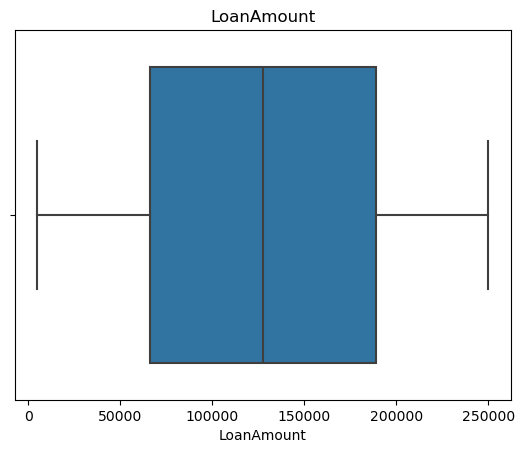

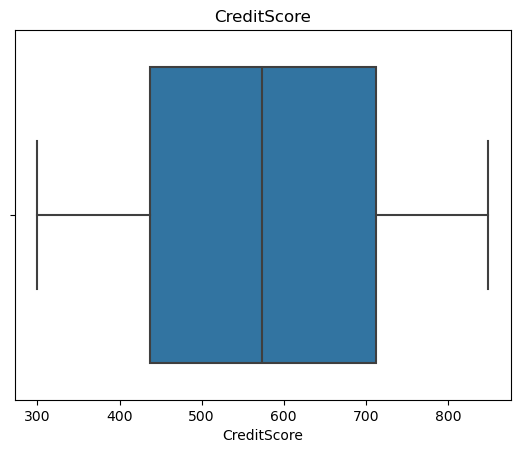

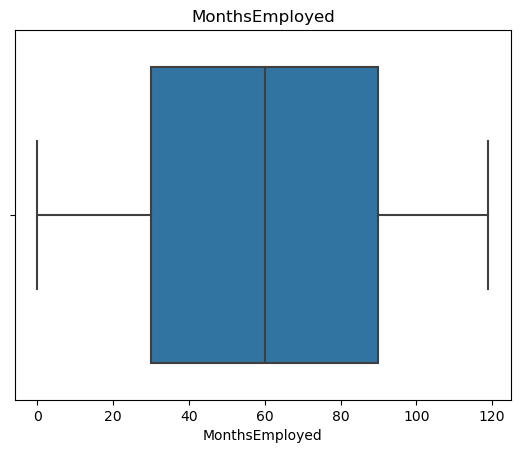

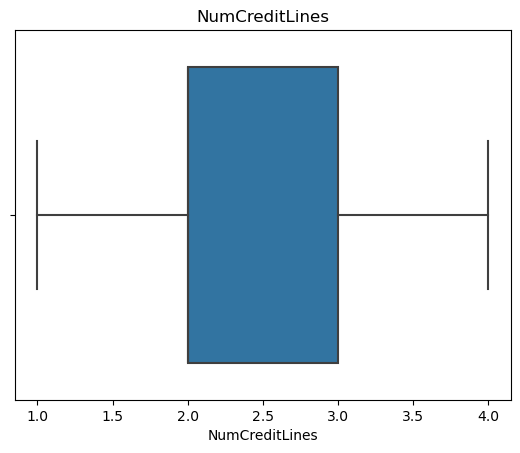

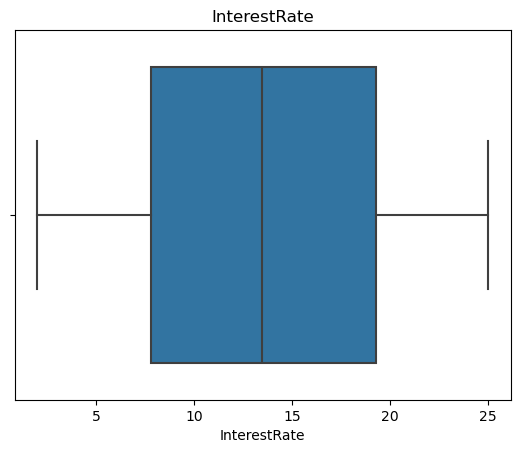

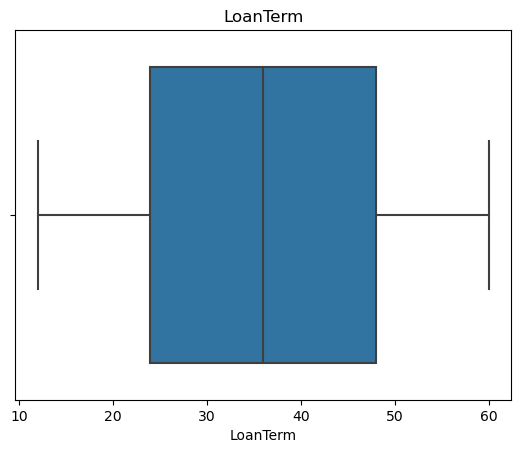

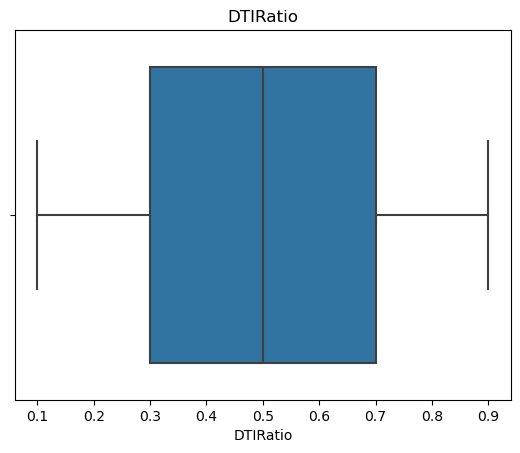

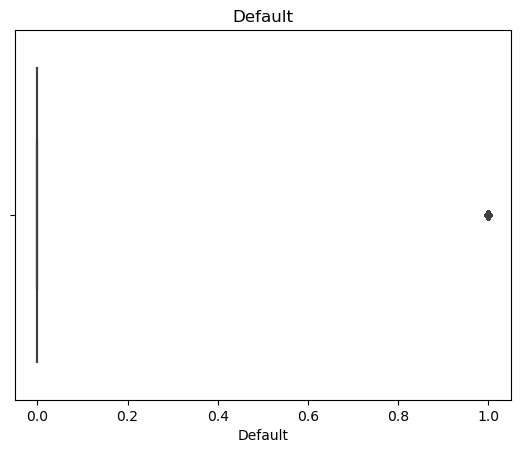

In [ ]:
# Create boxplots for each column
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

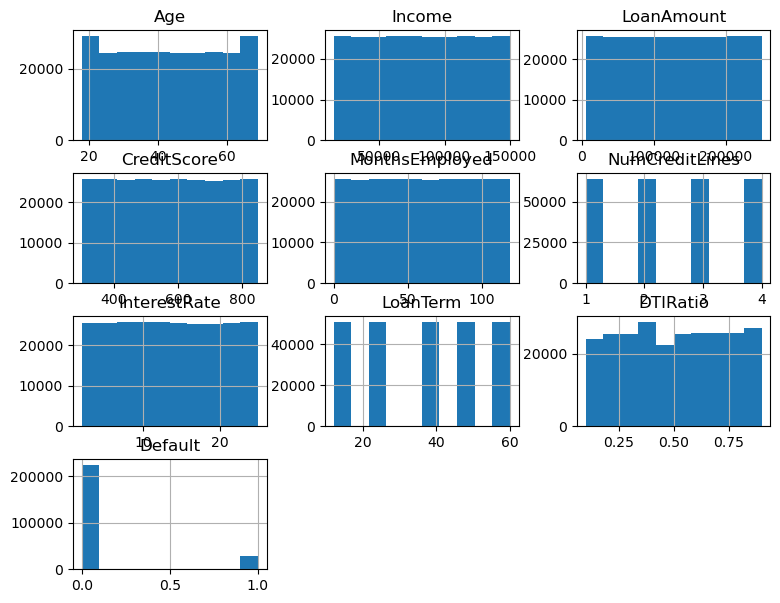

In [ ]:
# Visualize Numerical Variables
Numerical = df.select_dtypes(exclude=['object']).columns
df[Numerical].hist(figsize=(9,7))
plt.show()

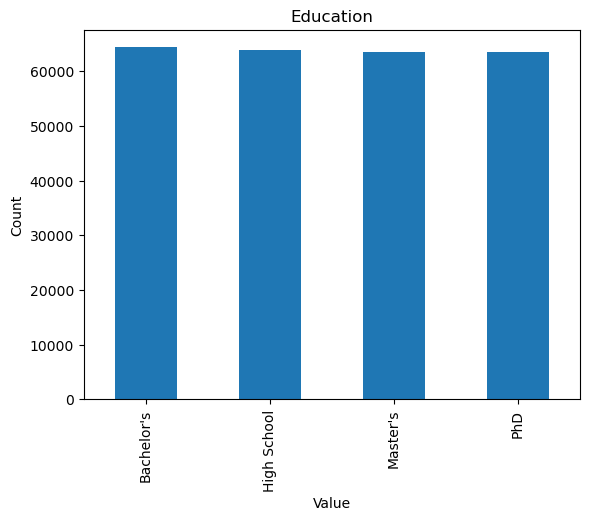

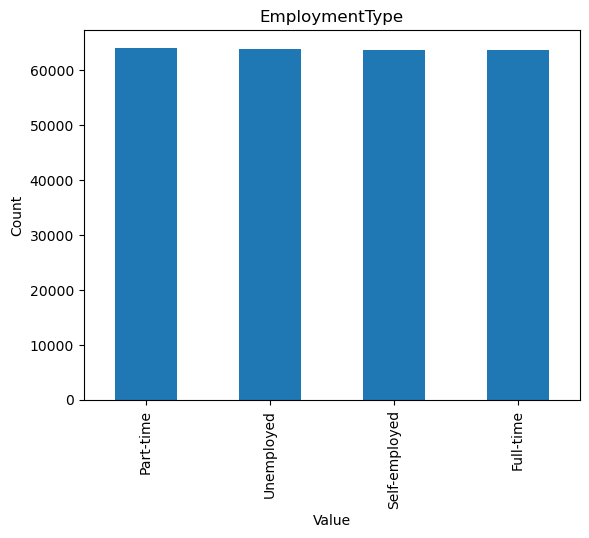

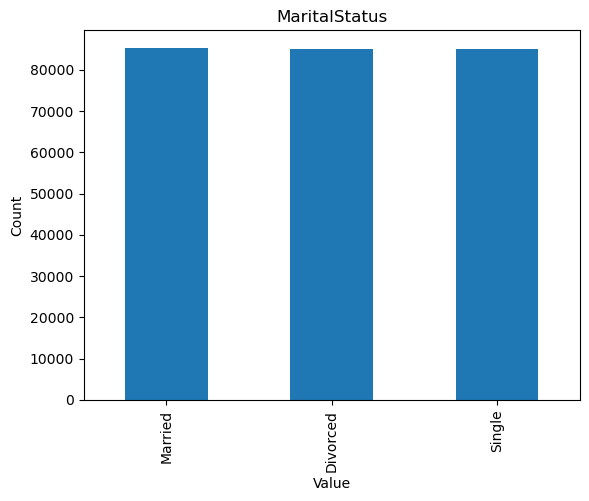

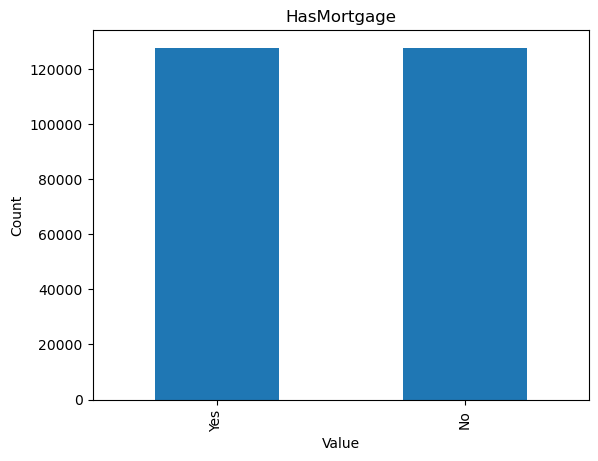

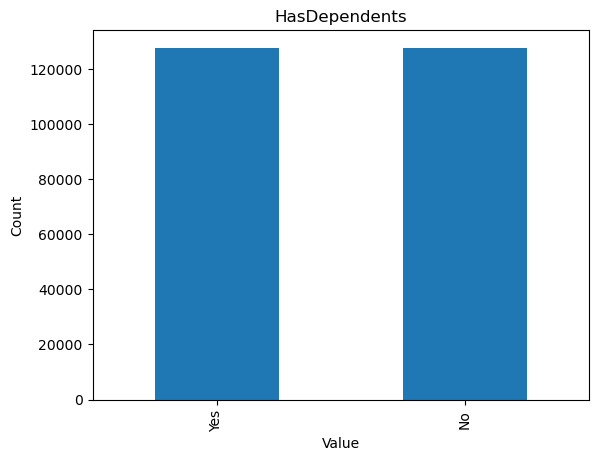

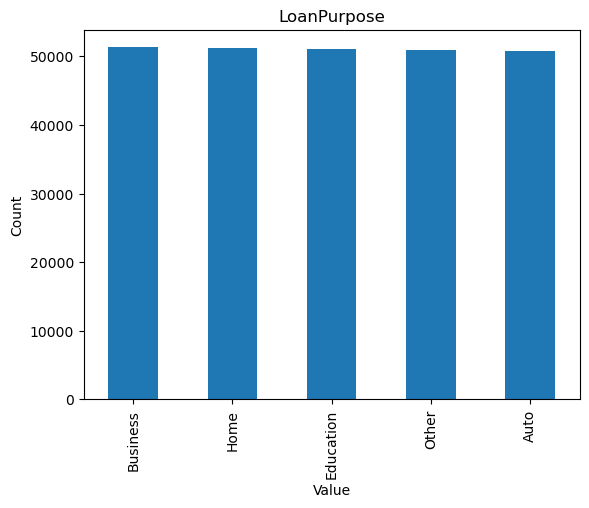

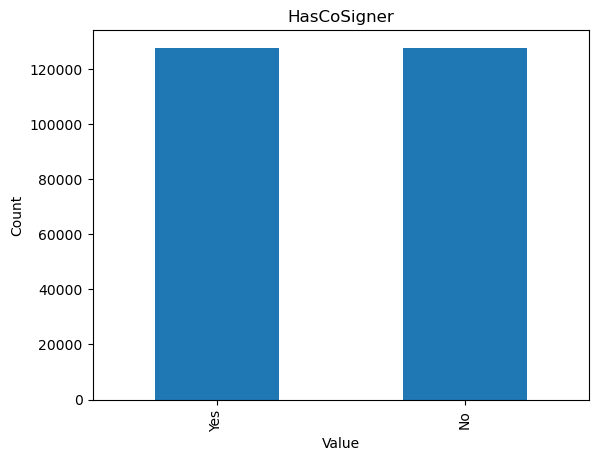

In [ ]:
# Visualize Categorical Variables
Categorical = df.select_dtypes(include=['object']).columns
for col in Categorical:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

<Figure size 640x480 with 0 Axes>

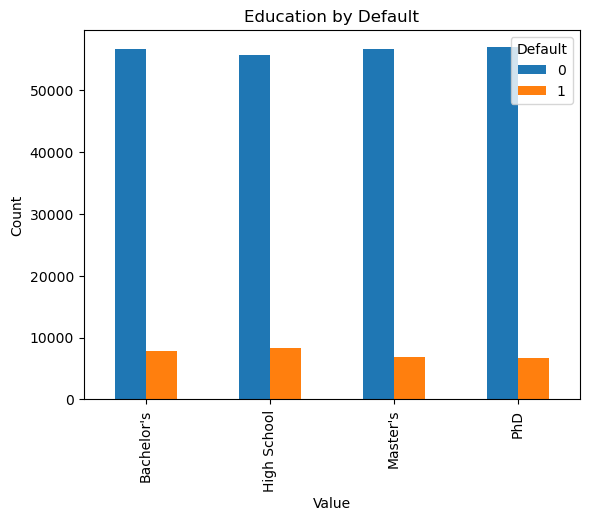

<Figure size 640x480 with 0 Axes>

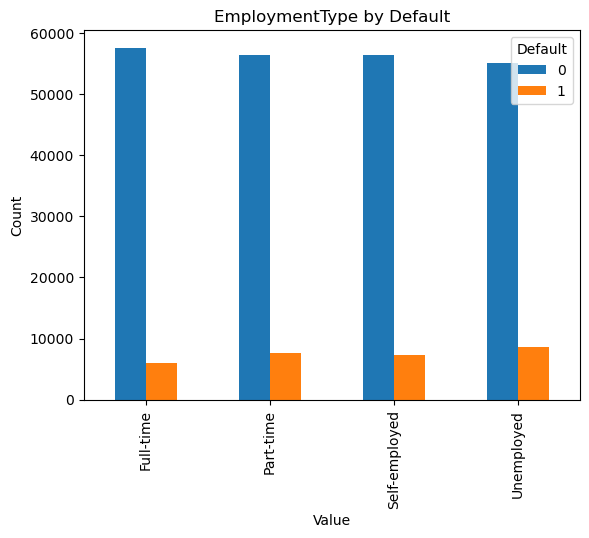

<Figure size 640x480 with 0 Axes>

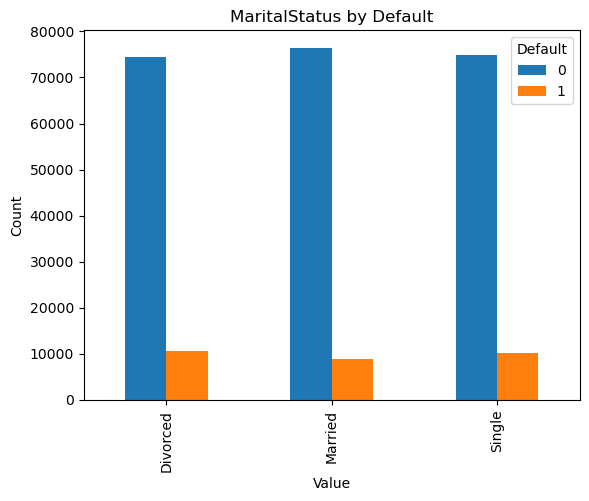

<Figure size 640x480 with 0 Axes>

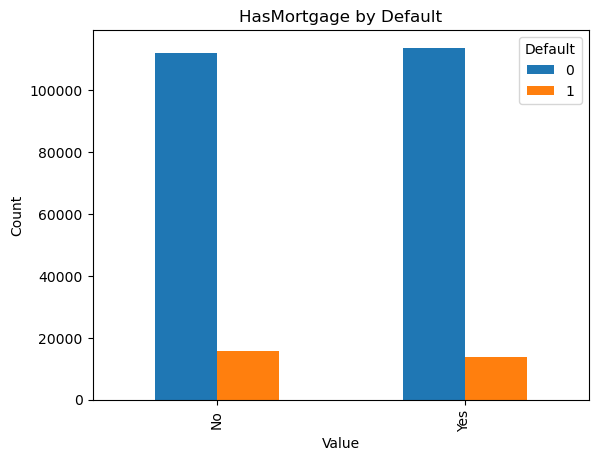

<Figure size 640x480 with 0 Axes>

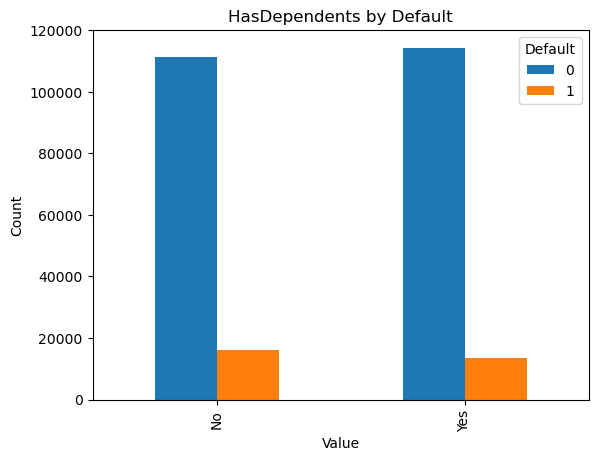

<Figure size 640x480 with 0 Axes>

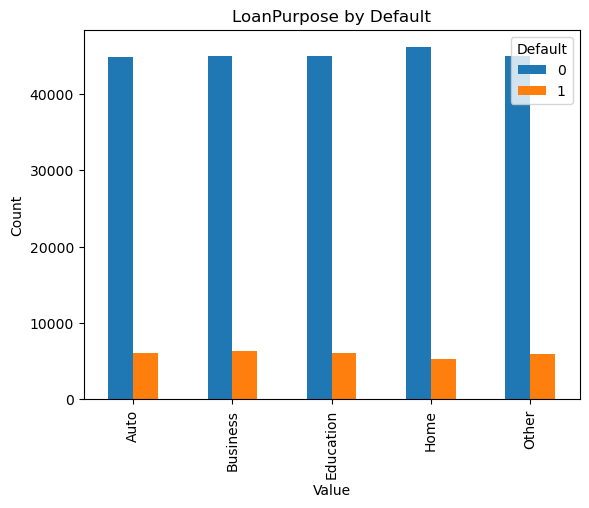

<Figure size 640x480 with 0 Axes>

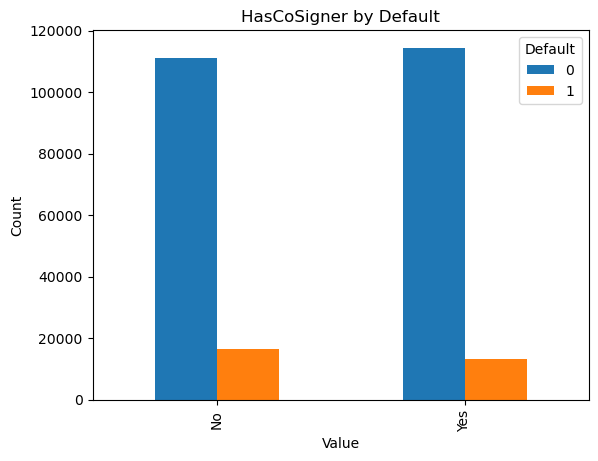

In [ ]:
# Visualize Categorical Variables by Default
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
  plt.figure()
  default_counts = df.groupby([col, 'Default'])[col].count().unstack()
  default_counts.plot(kind='bar', stacked=False)
  plt.title(col + ' by Default')
  plt.xlabel('Value')
  plt.ylabel('Count')
  plt.legend(title='Default')
  plt.show()

<Figure size 640x480 with 0 Axes>

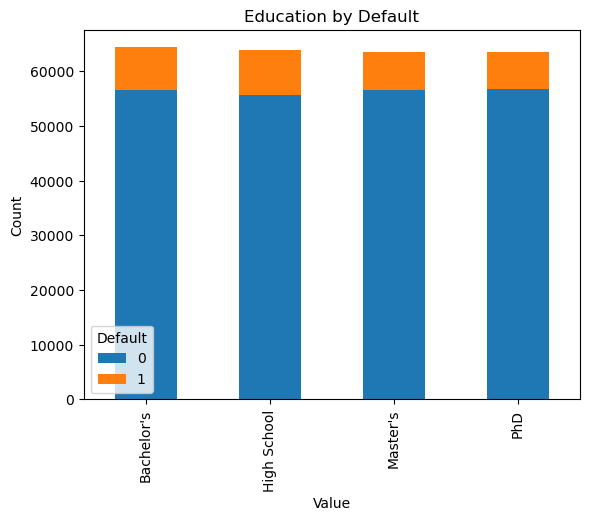

<Figure size 640x480 with 0 Axes>

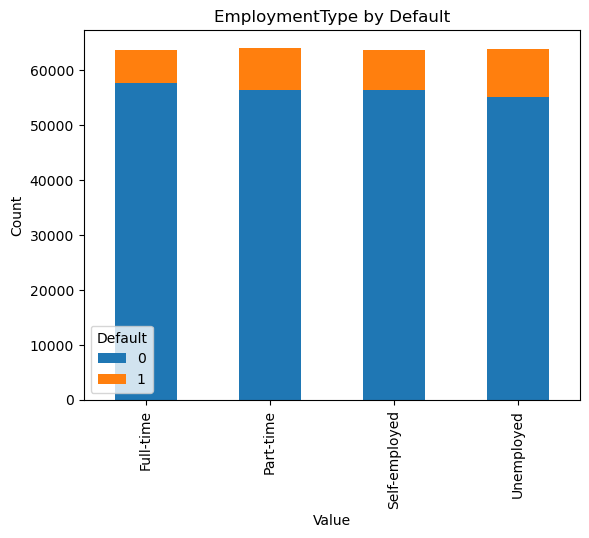

<Figure size 640x480 with 0 Axes>

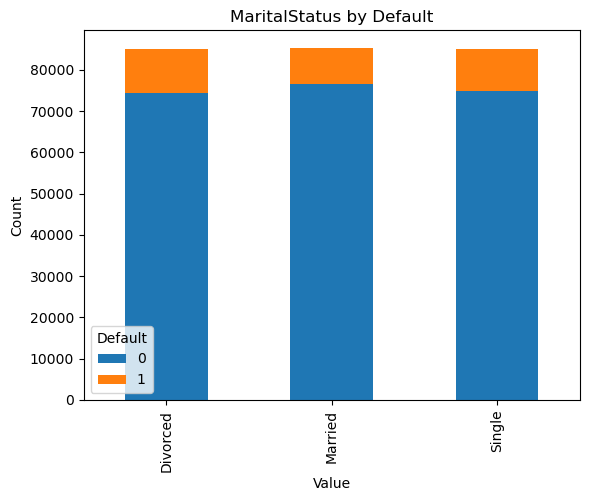

<Figure size 640x480 with 0 Axes>

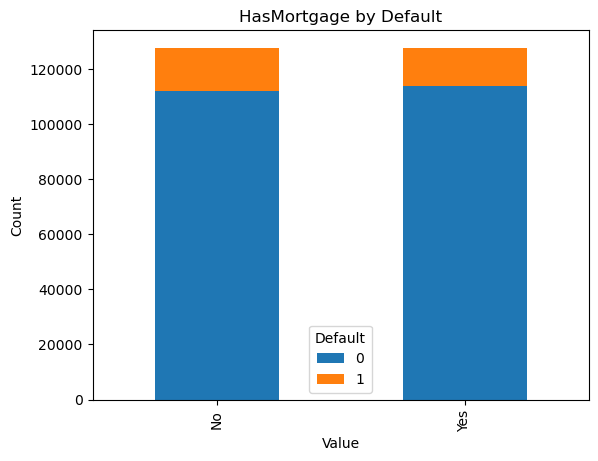

<Figure size 640x480 with 0 Axes>

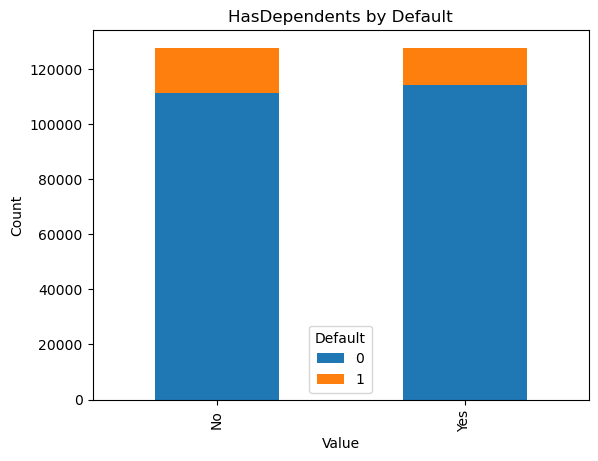

<Figure size 640x480 with 0 Axes>

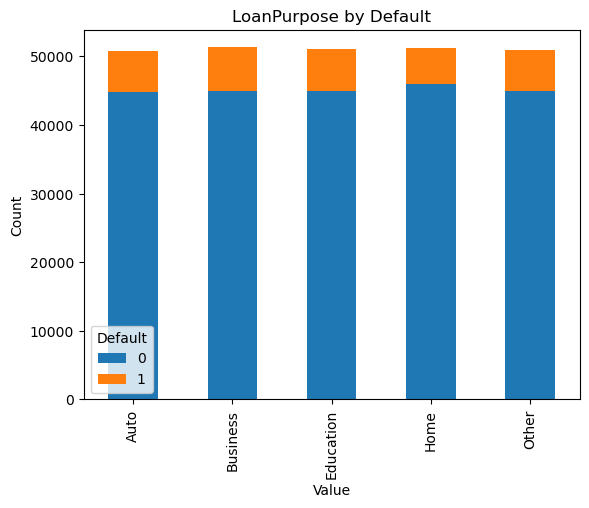

<Figure size 640x480 with 0 Axes>

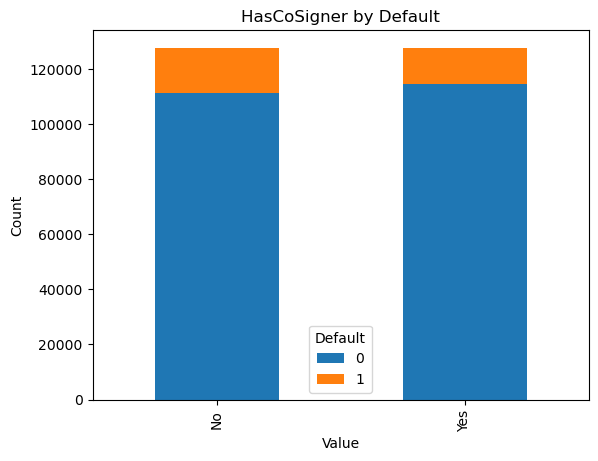

In [ ]:
# Visualize Categorical Variables by Default
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
  plt.figure()
  default_counts = df.groupby([col, 'Default'])[col].count().unstack()
  default_counts.plot(kind='bar', stacked=True)
  plt.title(col + ' by Default')
  plt.xlabel('Value')
  plt.ylabel('Count')
  plt.legend(title='Default')
  plt.show()

### Feature Engineering

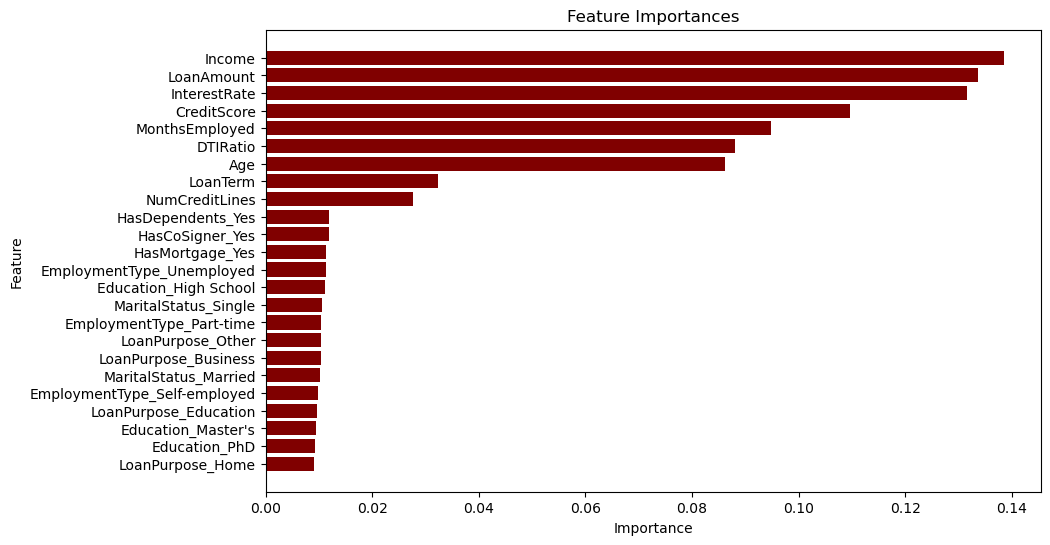

In [ ]:
df = df.copy()

# Seperate X and y
X = df.drop(['Default'], axis=1)
y = df['Default']

# Encode all categorical variable using One-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# Perform feature importance using Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_encoded, y)
feature_importances = rf_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Features by its importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X = df[['InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']]
y = df['Default']

In [ ]:
y.value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

##### - Our dataset shows a class imbalance, with defaults accounting for just 11.6% and non-defaults making up 88.4%.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##### - Since our default class is underrepresented compared to your non-default class, you need to use the SMOTE method to balance the class distribution.

In [ ]:
y_resampled.value_counts(normalize=True)

Default
0    0.5
1    0.5
Name: proportion, dtype: float64

##### - Here, both classes are balanced with .5 each.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.6922616805866324
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69     45127
           1       0.69      0.71      0.70     45151

    accuracy                           0.69     90278
   macro avg       0.69      0.69      0.69     90278
weighted avg       0.69      0.69      0.69     90278



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8843239770486718
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     45127
           1       0.92      0.84      0.88     45151

    accuracy                           0.88     90278
   macro avg       0.89      0.88      0.88     90278
weighted avg       0.89      0.88      0.88     90278



In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7741088637320277
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75     45127
           1       0.73      0.88      0.80     45151

    accuracy                           0.77     90278
   macro avg       0.79      0.77      0.77     90278
weighted avg       0.79      0.77      0.77     90278



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8224152063625689
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82     45127
           1       0.81      0.84      0.83     45151

    accuracy                           0.82     90278
   macro avg       0.82      0.82      0.82     90278
weighted avg       0.82      0.82      0.82     90278



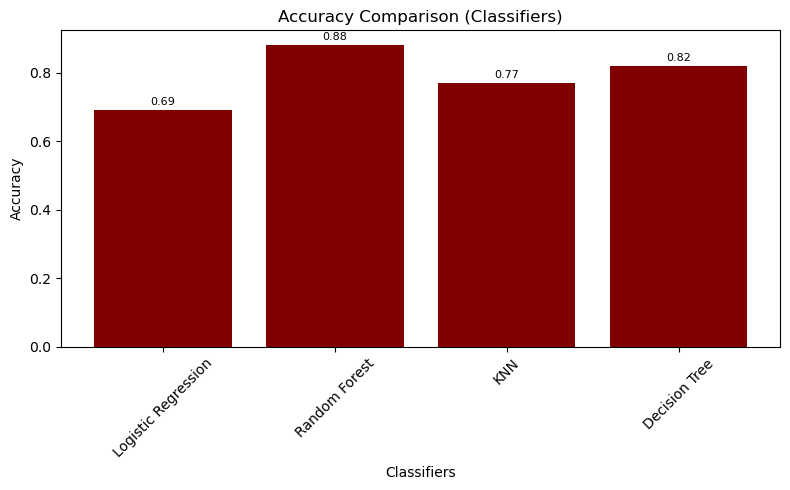

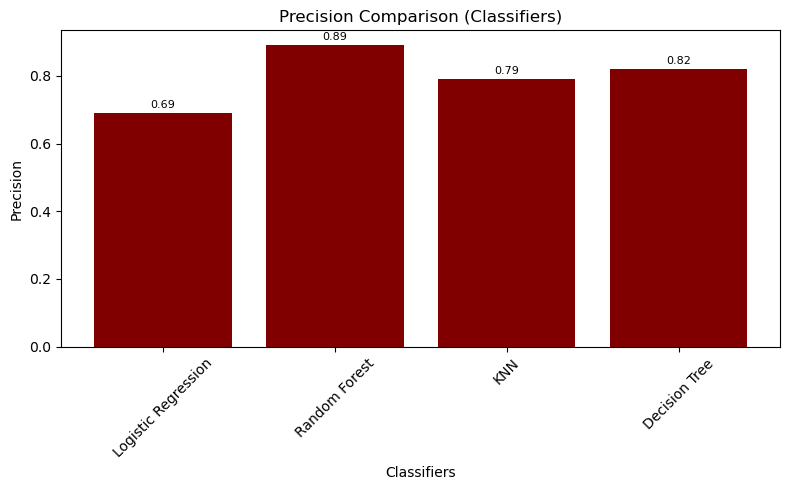

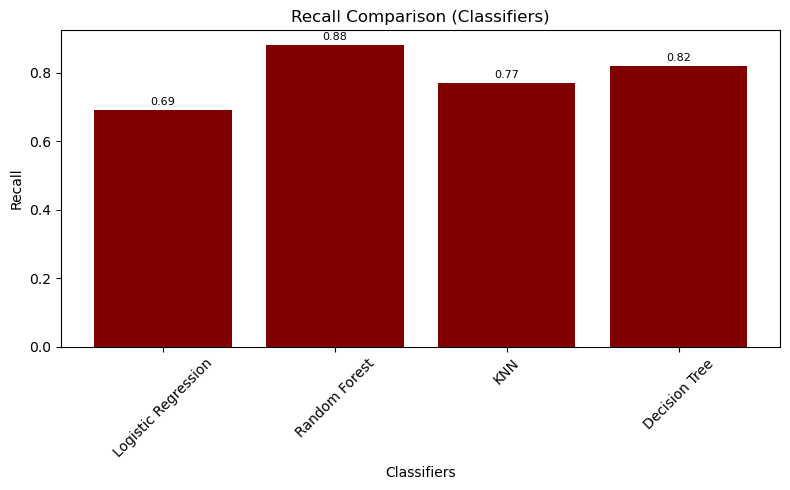

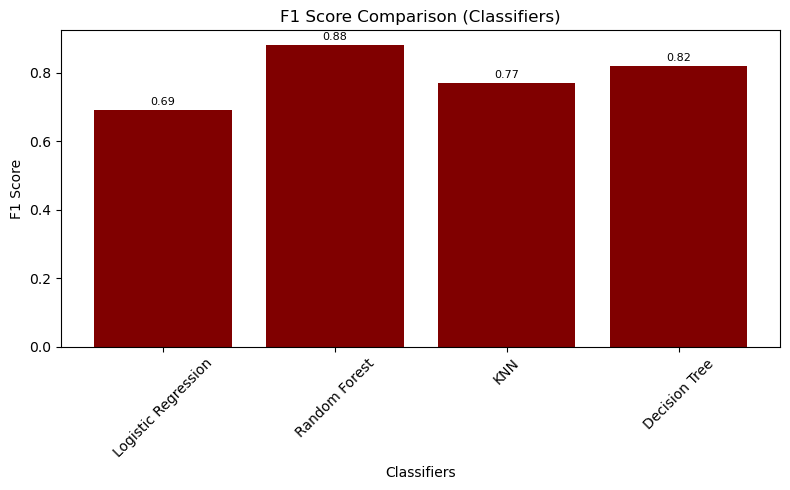

In [ ]:
# Metrics for each classifier
accuracy_logreg = 0.69
accuracy_rf = 0.88
accuracy_knn = 0.77
accuracy_dt = 0.82

precision_logreg = 0.69
precision_rf = 0.89
precision_knn = 0.79
precision_dt = 0.82

recall_logreg = 0.69
recall_rf = 0.88
recall_knn = 0.77
recall_dt = 0.82

f1_logreg = 0.69
f1_rf = 0.88
f1_knn = 0.77
f1_dt = 0.82
results = {
    'Classifier': ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_knn, accuracy_dt],
    'Precision': [precision_logreg, precision_rf, precision_knn, precision_dt],
    'Recall': [recall_logreg, recall_rf, recall_knn, recall_dt],
    'F1 Score': [f1_logreg, f1_rf, f1_knn, f1_dt]
}
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
# Bar plots for each evaluation metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric_name in metrics:
    plt.figure(figsize=(8, 5))  # Adjust figure size as needed
    bars = plt.bar(results_df['Classifier'], results_df[metric_name], color='maroon')  # Change color to maroon
    plt.xlabel('Classifiers')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison (Classifiers)')
    plt.xticks(rotation=45)
    # Add results on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()